<a href="https://colab.research.google.com/github/Shivani-Khare/MLnow_2.0/blob/main/EDA_%26_Univariate_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to Download the dataset](https://www.kaggle.com/sudalairajkumar/covid19-in-india)

**Date Created**: June 12 , 2021

Topic: EDA & Univariate Linear Regression

**Author**:
 Shivani Khare

*Description* :

This notebook contains **Exploratory Data Analysis** on COVID-19 data for Indian states has been considered for analysis of the following:

1. `Number of cases` in each state (confirmed cases, cured cases, number of deaths) ; Analysis for `Maharshtra` (Most affected state).

2. `State-Wise Testing` Analysis (Total samples collected, Positive cases) ; Analysis for `Maharashtra` (Highiest number of Testing rate).

3. `State-Wise Vaccination` Analysis.

**Univariate Linear Regression** for `Total Individuals Vaccinated` & `Total Doses Administered`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/EDA&LR/CovidDataset'

/content/drive/MyDrive/EDA&LR/CovidDataset


In [ ]:
ls

covid_19_india.csv           StatewiseTestingDetails.csv
covid_vaccine_statewise.csv  univariate_CovidVaccination_2.csv


Importing Libraries

In [ ]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [ ]:
CovidData = pd.read_csv('covid_19_india.csv', sep=',')  #reading the covid_19_india.csv file for covid data

In [ ]:
CovidData.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
CovidData.tail(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
15796,15797,2021-06-08,8:00 AM,Puducherry,-,-,100377,1638,109561
15797,15798,2021-06-08,8:00 AM,Punjab,-,-,545674,15160,580829
15798,15799,2021-06-08,8:00 AM,Rajasthan,-,-,922544,8687,946975
15799,15800,2021-06-08,8:00 AM,Sikkim,-,-,12846,273,17170
15800,15801,2021-06-08,8:00 AM,Tamil Nadu,-,-,1997299,27356,2256681
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083
15805,15806,2021-06-08,8:00 AM,West Bengal,-,-,1388771,16362,1432019


In [ ]:
CovidData = CovidData[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

In [ ]:
CovidData.columns=['date','state','cured','deaths','confirmed']

In [ ]:
CovidData.head()

,date,state,cured,deaths,confirmed,Fatality-Ratio
0,2020-01-30,Kerala,0,0,1,0.0
1,2020-01-31,Kerala,0,0,1,0.0
2,2020-02-01,Kerala,0,0,2,0.0
3,2020-02-02,Kerala,0,0,3,0.0
4,2020-02-03,Kerala,0,0,3,0.0


In [ ]:
CovidData.tail()

,date,state,cured,deaths,confirmed,Fatality-Ratio
15801,2021-06-08,Telangana,564303,3394,593103,0.005722
15802,2021-06-08,Tripura,49579,572,56169,0.010184
15803,2021-06-08,Uttarakhand,313566,6731,334419,0.020127
15804,2021-06-08,Uttar Pradesh,1662069,21333,1699083,0.012556
15805,2021-06-08,West Bengal,1388771,16362,1432019,0.011426


Analysing the **COVID-19 Statistics** for `June 08 , 2021`

In [ ]:
#Covid cases recorded for each state on June 08, 2021
Covidcases_Today = CovidData[CovidData.date == '2021-06-08']  
Covidcases_Today


,date,state,cured,deaths,confirmed
15770,2021-06-08,Andaman and Nicobar Islands,6912,123,7131
15771,2021-06-08,Andhra Pradesh,1637149,11552,1763211
15772,2021-06-08,Arunachal Pradesh,26131,125,29696
15773,2021-06-08,Assam,385032,3695,438746
15774,2021-06-08,Bihar,700224,5424,713879
15775,2021-06-08,Chandigarh,59193,774,60707
15776,2021-06-08,Chhattisgarh,947527,13243,981860
15777,2021-06-08,Dadra and Nagar Haveli and Daman and Diu,10261,4,10419
15778,2021-06-08,Delhi,1399640,24627,1429475
15779,2021-06-08,Goa,150574,2840,159811


In [ ]:
#List for maximum cured cases for each state as of June 08, 2021 

maximum_cured_cases = Covidcases_Today.sort_values(by = 'cured', ascending = False)  #state with highest cured cases displayed at the top
maximum_cured_cases

,date,state,cured,deaths,confirmed
15790,2021-06-08,Maharashtra,5564348,100470,5842000
15786,2021-06-08,Kerala,2483992,10157,2642395
15785,2021-06-08,Karnataka,2436716,31920,2707481
15800,2021-06-08,Tamil Nadu,1997299,27356,2256681
15804,2021-06-08,Uttar Pradesh,1662069,21333,1699083
15771,2021-06-08,Andhra Pradesh,1637149,11552,1763211
15778,2021-06-08,Delhi,1399640,24627,1429475
15805,2021-06-08,West Bengal,1388771,16362,1432019
15776,2021-06-08,Chhattisgarh,947527,13243,981860
15798,2021-06-08,Rajasthan,922544,8687,946975


In [ ]:
#List for maximum confirmed cases for each state as of June 08, 2021 

maximum_confirmed_cases = Covidcases_Today.sort_values(by = 'confirmed', ascending = False) #state woth highiest confirmed cases displayed at the top
maximum_confirmed_cases

,date,state,cured,deaths,confirmed
15790,2021-06-08,Maharashtra,5564348,100470,5842000
15785,2021-06-08,Karnataka,2436716,31920,2707481
15786,2021-06-08,Kerala,2483992,10157,2642395
15800,2021-06-08,Tamil Nadu,1997299,27356,2256681
15771,2021-06-08,Andhra Pradesh,1637149,11552,1763211
15804,2021-06-08,Uttar Pradesh,1662069,21333,1699083
15805,2021-06-08,West Bengal,1388771,16362,1432019
15778,2021-06-08,Delhi,1399640,24627,1429475
15776,2021-06-08,Chhattisgarh,947527,13243,981860
15798,2021-06-08,Rajasthan,922544,8687,946975


In [ ]:
#List for maximum cured cases for each state as of June 08, 2021   

maximum_deaths = Covidcases_Today.sort_values(by = 'deaths', ascending = False)  #state with highiest deaths displayed at the top
maximum_confirmed_cases

,date,state,cured,deaths,confirmed
15790,2021-06-08,Maharashtra,5564348,100470,5842000
15785,2021-06-08,Karnataka,2436716,31920,2707481
15786,2021-06-08,Kerala,2483992,10157,2642395
15800,2021-06-08,Tamil Nadu,1997299,27356,2256681
15771,2021-06-08,Andhra Pradesh,1637149,11552,1763211
15804,2021-06-08,Uttar Pradesh,1662069,21333,1699083
15805,2021-06-08,West Bengal,1388771,16362,1432019
15778,2021-06-08,Delhi,1399640,24627,1429475
15776,2021-06-08,Chhattisgarh,947527,13243,981860
15798,2021-06-08,Rajasthan,922544,8687,946975


In [ ]:
top_10states_cured = maximum_cured_cases [0:10]  #Top 10 states with highiest number of cures

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

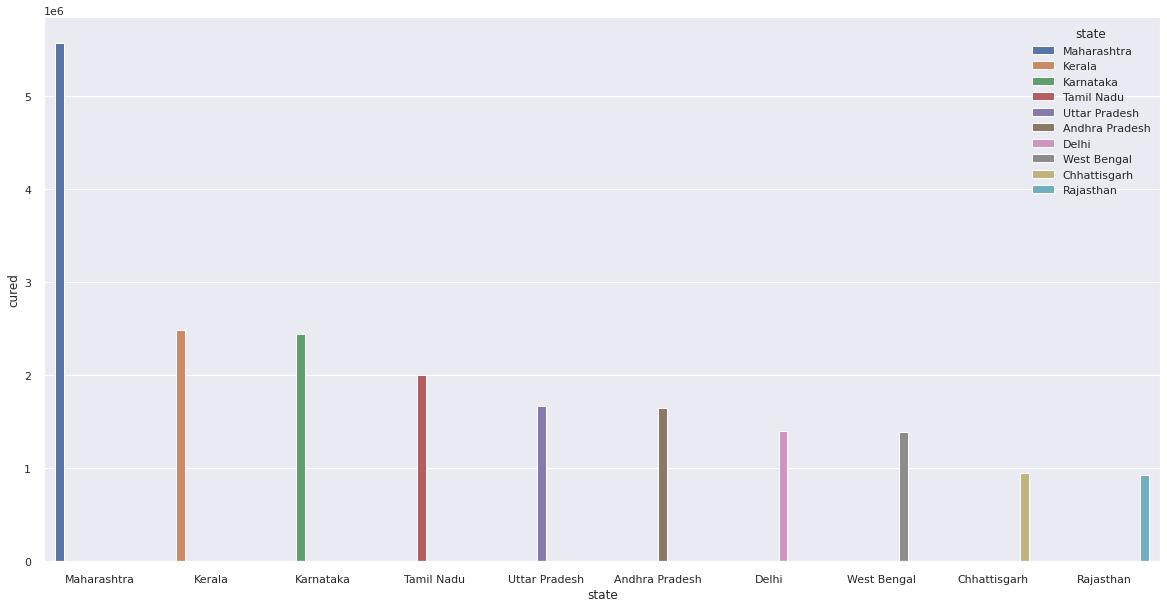

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="state",y="cured",data=top_10states_cured,hue="state")
plt.show()

In [ ]:
top_10states_confirmed = maximum_confirmed_cases [0:10]  #top 10 states with highiest number of confirmed cases

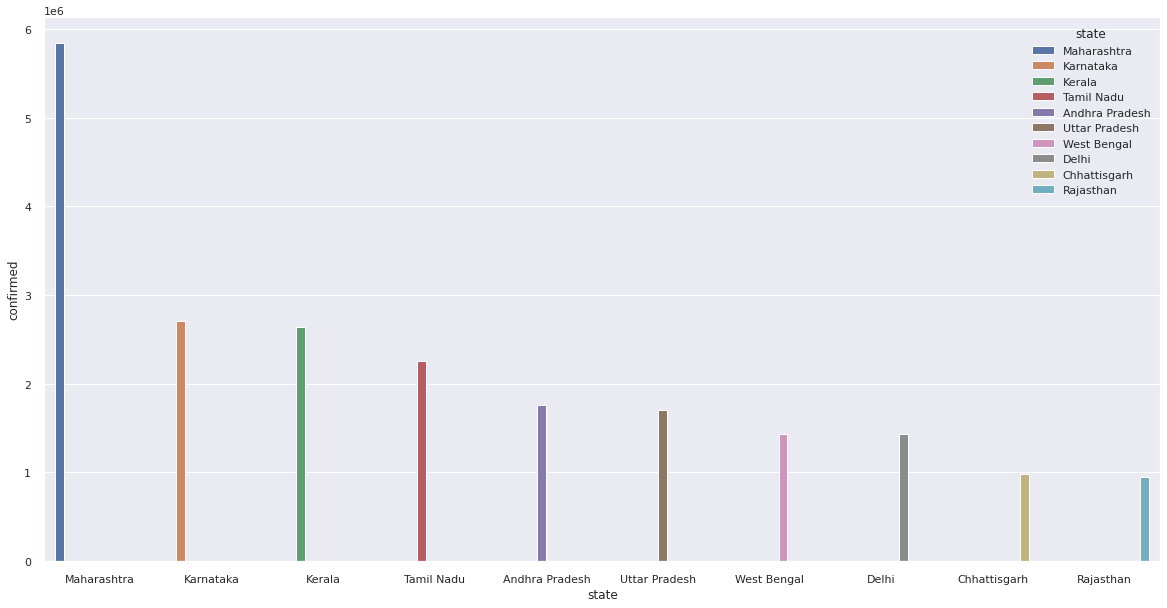

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="state",y="confirmed",data = top_10states_confirmed,hue="state")
plt.show()

In [ ]:
top_10states_deaths = maximum_deaths [0:10]  #top 10 states with highiest number of deaths

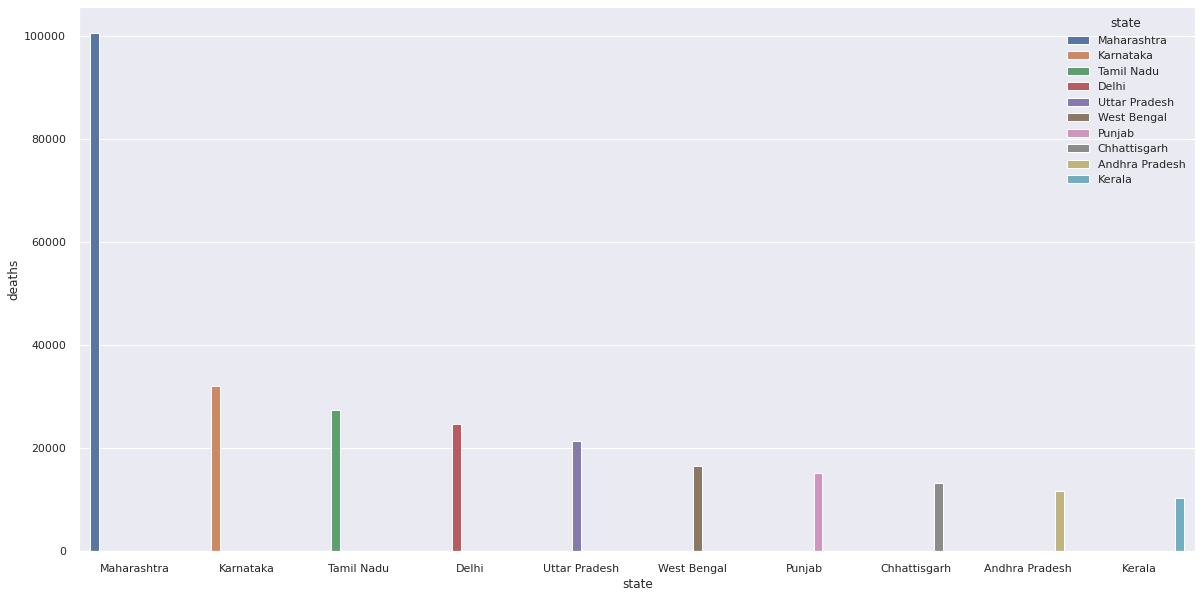

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="state",y="deaths",data=top_10states_deaths,hue="state")
plt.show()

Calculation of `Fatality Ratio` for states


In [ ]:
CovidData['Fatality-Ratio'] = CovidData['deaths']/CovidData['confirmed']

In [ ]:
CovidData['Fatality-Ratio']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
15801    0.005722
15802    0.010184
15803    0.020127
15804    0.012556
15805    0.011426
Name: Fatality-Ratio, Length: 15806, dtype: float64

It can be seen that `Maharashtra` has the highiest number of `confirmed cases` on `2021-06-08`.

## Analysis for `Maharashtra`.

In [ ]:
#covid cases in maharashtra with the fatality ratio

Maharashtra = CovidData[CovidData.state=='Maharashtra']
Maharashtra

,date,state,cured,deaths,confirmed,Fatality-Ratio
76,2020-03-09,Maharashtra,0,0,2,0.000000
91,2020-03-10,Maharashtra,0,0,5,0.000000
97,2020-03-11,Maharashtra,0,0,2,0.000000
120,2020-03-12,Maharashtra,0,0,11,0.000000
133,2020-03-13,Maharashtra,0,0,14,0.000000
...,...,...,...,...,...,...
15646,2021-06-04,Maharashtra,5486206,97394,5791413,0.016817
15682,2021-06-05,Maharashtra,5507058,98771,5805565,0.017013
15718,2021-06-06,Maharashtra,5528834,99512,5819224,0.017101
15754,2021-06-07,Maharashtra,5543267,100130,5831781,0.017170


*Analysis regarding the behaviour of `confirmed cases` in `Maharashtra` from `2020-03-09` to `2021-06-08`.*

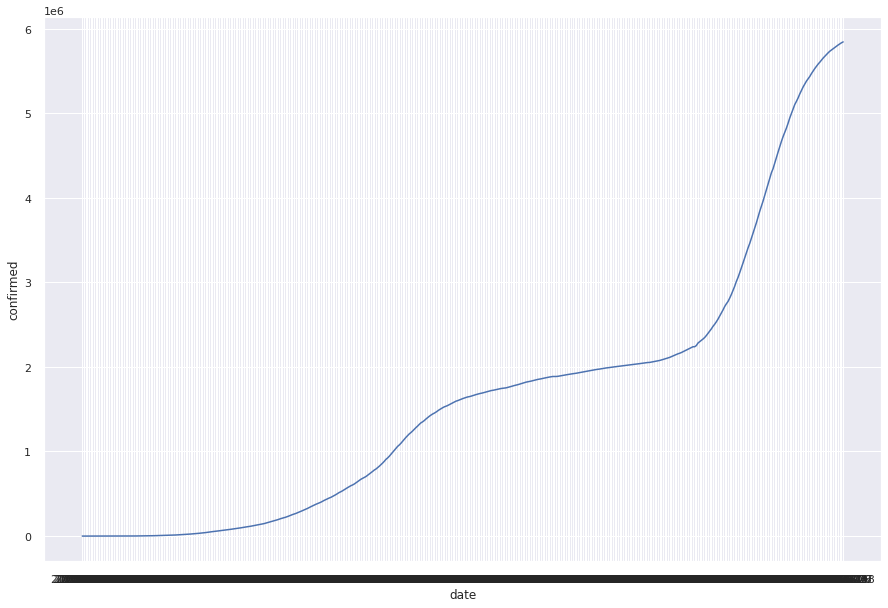

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=Maharashtra,color="b")
plt.show()

*Analysis regarding the behaviour of `cured cases` in `Maharashtra` from `2020-03-09` to `2021-06-08`.*

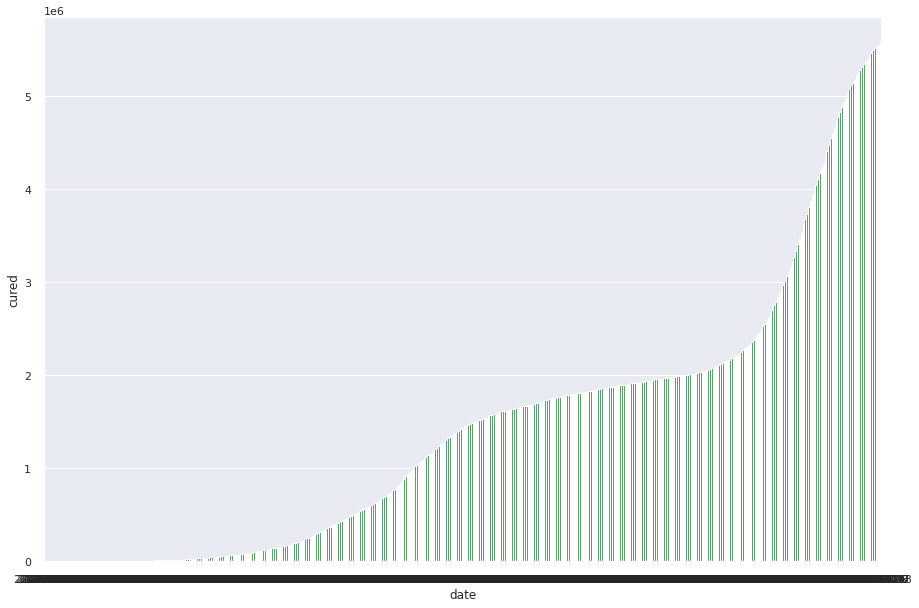

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="date",y="cured",data=Maharashtra,color="g")
plt.show()

*Analysis regarding the behaviour of `deaths` in `Maharashtra` from `2020-03-09` to `2021-06-08`.*

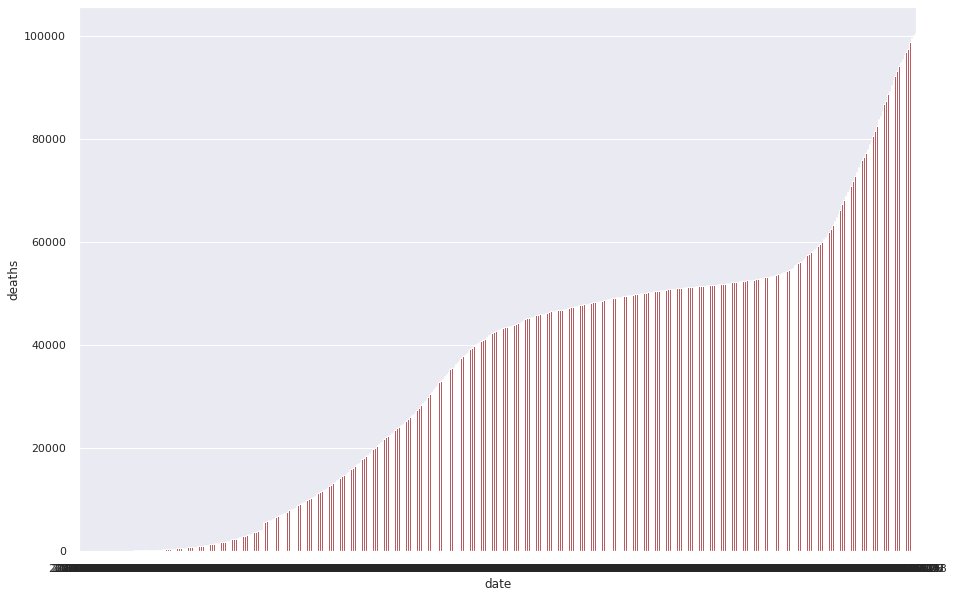

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="date",y="deaths",data=Maharashtra,color="r")
plt.show()

## Analysis of `State-wise Testing details` for COVID-19

In [ ]:
CovidTest = pd.read_csv('StatewiseTestingDetails.csv', sep=',')  #reading the state-wise testing details file for testing data

In [ ]:
CovidTest

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
14093,2021-06-03,West Bengal,12645747.0,NaN,NaN
14094,2021-06-04,West Bengal,12716953.0,NaN,NaN
14095,2021-06-05,West Bengal,12789625.0,NaN,NaN
14096,2021-06-06,West Bengal,12859678.0,NaN,NaN


Analysing the COVID-19 `Testing Statistics` for `June 08 , 2021`

In [ ]:
CovidTest_latestdetails = CovidTest[CovidTest.Date == '2021-06-07']
CovidTest_latestdetails

,Date,State,TotalSamples,Negative,Positive
812,2021-06-07,Andhra Pradesh,19856521.0,18093310,NaN
1225,2021-06-07,Arunachal Pradesh,638028.0,595531,NaN
1630,2021-06-07,Assam,11808737.0,NaN,NaN
2055,2021-06-07,Bihar,30673286.0,NaN,NaN
2471,2021-06-07,Chandigarh,525544.0,463603,NaN
2889,2021-06-07,Chhattisgarh,9483235.0,NaN,NaN
3484,2021-06-07,Delhi,19821925.0,NaN,NaN
3903,2021-06-07,Goa,848687.0,NaN,NaN
4326,2021-06-07,Gujarat,22309332.0,NaN,NaN
4754,2021-06-07,Haryana,9323986.0,NaN,NaN


*Analysis for* `Total Samples` *collected by each* `State` 

In [ ]:
#List for total samples for each state as of June 08, 2021   
maximum_CovidTest = CovidTest_latestdetails.sort_values (by='TotalSamples', ascending = False) #state with highiest total samples displayes at the top
maximum_CovidTest

,Date,State,TotalSamples,Negative,Positive
13241,2021-06-07,Uttar Pradesh,51622903.0,NaN,NaN
8096,2021-06-07,Maharashtra,36696139.0,NaN,NaN
6450,2021-06-07,Karnataka,30732003.0,NaN,NaN
2055,2021-06-07,Bihar,30673286.0,NaN,NaN
12077,2021-06-07,Tamil Nadu,28892497.0,NaN,NaN
4326,2021-06-07,Gujarat,22309332.0,NaN,NaN
6883,2021-06-07,Kerala,20578167.0,NaN,NaN
812,2021-06-07,Andhra Pradesh,19856521.0,18093310,NaN
3484,2021-06-07,Delhi,19821925.0,NaN,NaN
12432,2021-06-07,Telangana,15994238.0,NaN,NaN


In [ ]:
import seaborn as sns  

In [ ]:
import matplotlib.pyplot as plt


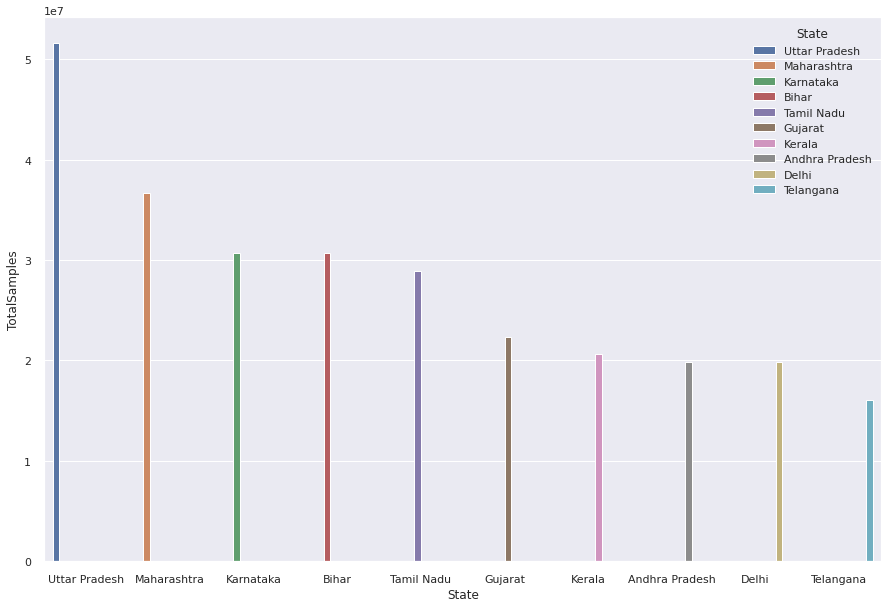

In [ ]:
#Plot for total samples for each state

sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='State',y='TotalSamples', data = maximum_CovidTest [:10], hue="State")
plt.show()

*Analysis for Covid*-`Positive cases` *recorded by each* `State`

In [ ]:
#Test for positivity (Covid Positive). State with hghiest positive cases at the top

CovidTest_positive=CovidTest.groupby('State')['Positive'].sum().sort_values(ascending=False).reset_index()

In [ ]:
px.bar(CovidTest_positive.head(10),x='State',y='Positive')

### Analysis of `Total Samples` for `Maharashtra`. 

In [ ]:
Totalsamples_Maharashtra = CovidTest[CovidTest.State=='Maharashtra']
Totalsamples_Maharashtra

,Date,State,TotalSamples,Negative,Positive
7673,2020-04-05,Maharashtra,16008.0,14837,NaN
7674,2020-04-06,Maharashtra,17563.0,15808,868.0
7675,2020-04-07,Maharashtra,20877.0,19290,1018.0
7676,2020-04-09,Maharashtra,20877.0,19290,868.0
7677,2020-04-10,Maharashtra,30000.0,28865,1135.0
...,...,...,...,...,...
8092,2021-06-03,Maharashtra,35774626.0,NaN,NaN
8093,2021-06-04,Maharashtra,36031395.0,NaN,NaN
8094,2021-06-05,Maharashtra,36271483.0,NaN,NaN
8095,2021-06-06,Maharashtra,36508967.0,NaN,NaN


## Analysis of State-wise `Vaccination` details for COVID-19.

In [ ]:
CovidVaccination = pd.read_csv('covid_vaccine_statewise.csv', sep=',')  #reading 'covid_vaccine_statewise.csv file for vaccination details

In [ ]:
CovidVaccination.head()

















































,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


*Analysis of* `Male` and `female` *vaccinated* *ratio for COVID-19*

In [ ]:
import plotly.express as px

In [ ]:
male =CovidVaccination["Male(Individuals Vaccinated)"].sum() 
female =CovidVaccination["Female(Individuals Vaccinated)"].sum()  
trans = CovidVaccination["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")


*Analysis of* `Covisheild` *and* `Covaxin` *dosage for COVID-19*.

In [ ]:
Covaxin = CovidVaccination["Total Covaxin Administered"].sum() 
Covishield = CovidVaccination["Total CoviShield Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

*Analysis of* `first dose` *and* `second dose` *given* *for COVID-19*.

In [ ]:
First_Dose_Administered = CovidVaccination["First Dose Administered"].sum() 
Second_Dose_Administered = CovidVaccination["Second Dose Administered"].sum()  
px.pie(names=["First Dose Administered","Second Dose Administered"],values=[First_Dose_Administered, Second_Dose_Administered],title="Number of Doses Administered")

In [ ]:
CovidVaccination['State'].nunique() #number of states conducting vaccination

37

## Univariate Analysis for `Total Individuals Vaccinated` and `Total Doses Administered`.

We are just going to consider the columns `Total Individuals Vaccinated` and `Total Doses Administered` for univariate linear regression

$(Total Doses Administered)_i = (Total Individuals Vaccinated)_i  \cdot \theta_1 + \theta_0$

In [ ]:
uniCovidVaccination = CovidVaccination[['Total Individuals Vaccinated', 'Total Doses Administered']]
uniCovidVaccination.head()

,Total Individuals Vaccinated,Total Doses Administered
0,48276.0,48276.0
1,58604.0,58604.0
2,99449.0,99449.0
3,195525.0,195525.0
4,251280.0,251280.0


In [ ]:
uniCovidVaccination.to_csv('univariate_CovidVaccination_2.csv')

In [ ]:
ls

covid_19_india.csv           StatewiseTestingDetails.csv
covid_vaccine_statewise.csv  univariate_CovidVaccination_2.csv


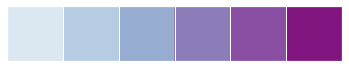

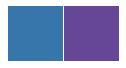

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('BuPu')) #Purple to Orange colors
pal = sns.color_palette('BuPu', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#3776ab', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
uniCovidVaccination.columns

Index(['Total Individuals Vaccinated', 'Total Doses Administered'], dtype='object')

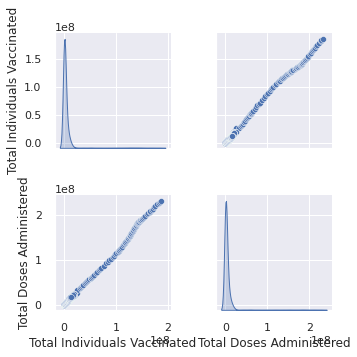

In [ ]:
sns.pairplot(uniCovidVaccination,
             x_vars = ['Total Individuals Vaccinated', 'Total Doses Administered'],
             y_vars =  ['Total Individuals Vaccinated', 'Total Doses Administered'],
       diag_kind='kde'
             )

In [ ]:
trainDataset = uniCovidVaccination.sample(frac=0.8, random_state=0) 
testDataset = uniCovidVaccination.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

      Total Individuals Vaccinated  Total Doses Administered
5230                     1081891.0                 1261351.0
854                      8467861.0                10247415.0
3943                       22707.0                   22707.0
725                        25254.0                   25254.0
2782                        1824.0                    1931.0
    Total Individuals Vaccinated  Total Doses Administered
0                        48276.0                   48276.0
7                       759008.0                  759008.0
21                     5111827.0                 5111827.0
24                     6002474.0                 6002474.0
25                     6462270.0                 6462270.0


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(4262, 2)
(1066, 2)


In [ ]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

      Total Individuals Vaccinated  Total Doses Administered
5230                     1081891.0                 1261351.0
854                      8467861.0                10247415.0
3943                       22707.0                   22707.0
725                        25254.0                   25254.0
2782                        1824.0                    1931.0
    Total Individuals Vaccinated  Total Doses Administered
0                        48276.0                   48276.0
7                       759008.0                  759008.0
21                     5111827.0                 5111827.0
24                     6002474.0                 6002474.0
25                     6462270.0                 6462270.0


In [ ]:
trainLabels = trainFeatures.pop('Total Doses Administered')
testLabels = testFeatures.pop('Total Doses Administered')

print(trainLabels.head())
print(testLabels.head())

5230     1261351.0
854     10247415.0
3943       22707.0
725        25254.0
2782        1931.0
Name: Total Doses Administered, dtype: float64
0       48276.0
7      759008.0
21    5111827.0
24    6002474.0
25    6462270.0
Name: Total Doses Administered, dtype: float64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

      Total Individuals Vaccinated
5230                     1081891.0
854                      8467861.0
3943                       22707.0
725                        25254.0
2782                        1824.0
    Total Individuals Vaccinated
0                        48276.0
7                       759008.0
21                     5111827.0
24                     6002474.0
25                     6462270.0


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = tf.keras.optimizers.Adam(0.001), 
   
    metrics = ['mae', 'mse'] 
)

In [ ]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
134/134 [==============================] - 1s 2ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 2/300
134/134 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 3/300
134/134 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 4/300
134/134 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 5/300
134/134 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 6/300
134/134 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 7/300
134/134 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan -